In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.api import VAR

##Vector Autoregression (VAR) is a generalization of AR models to multivariate time series, where each variable depends not only on its own past values but also on the past values of other variables in the system.

In [2]:
# Load multiple time series: Meta stock data
df = yf.download("META", start="2023-01-01", end="2025-06-16")[["Close", "Volume"]]

<ipython-input-2-2034376447>:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("META", start="2023-01-01", end="2025-06-16")[["Close", "Volume"]]
[*********************100%***********************]  1 of 1 completed


In [3]:
# Normalize volume (for comparison) and preprocess
df["Volume"] = df["Volume"] / 1e6  # scale volume in millions
df = df.dropna()


In [4]:
# Convert to stationary series (first difference)
df_diff = df.diff().dropna()

In [5]:
# Split into training and testing sets
n_obs = 10  # reserve last 10 days for forecasting
train, test = df_diff[:-n_obs], df_diff[-n_obs:]


In [6]:
# Fit VAR model
model = VAR(train)
results = model.fit(maxlags=15, ic='aic')
print(f"Selected Lag Order: {results.k_ar}")


Selected Lag Order: 4


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [7]:
# Forecast
forecast_input = train.values[-results.k_ar:]
forecast = results.forecast(y=forecast_input, steps=n_obs)
forecast_df = pd.DataFrame(forecast, index=test.index, columns=train.columns)


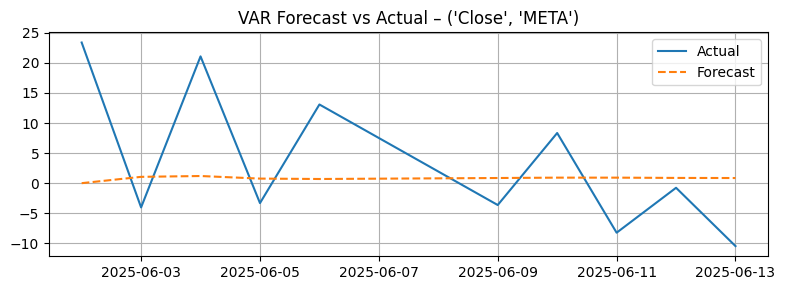

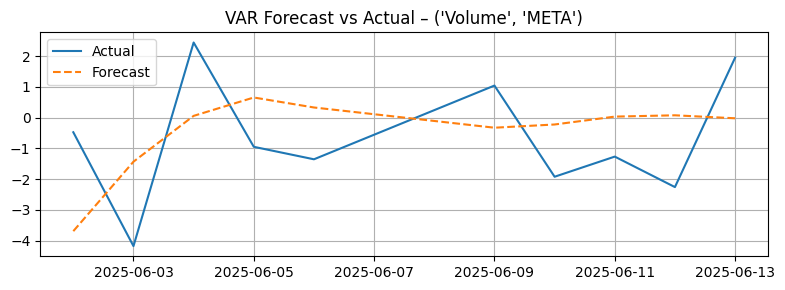

In [8]:
# Plot forecasts vs actual
for col in train.columns:
    plt.figure(figsize=(8, 3))
    plt.plot(test.index, test[col], label="Actual")
    plt.plot(forecast_df.index, forecast_df[col], label="Forecast", linestyle="--")
    plt.title(f"VAR Forecast vs Actual – {col}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()